### Note
While working with the datasets, I have observed that the choice of hyper-parameters makes a **huge** difference. So, if you want to try this on your own dataset, make sure to try bunch of different hyper-parameter settings.

In [1]:
import numpy as np
np.set_printoptions(suppress=True)

from nn import NN

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_digits, load_iris

### Train-Test Split and Adjust Dimensions

In [2]:
def split_dataset(X,y):
    # size of X : [num_input x num_dimension]
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
    train_X = train_X.T
    test_X = test_X.T
    
    
    return train_X, train_y, test_X, test_y

def normalize_data(train_X, test_X):
    means = np.mean(train_X, axis = 1, keepdims=True)
    std_dev = np.std(train_X, axis = 1, keepdims=True)

    train_X = (train_X - means)/std_dev
    test_X = (test_X - means)/std_dev
    
    return train_X, test_X, means, std_dev

## Datasets

#### 1) Create Test Dataset from sklearn

(1000, 2) (1000, 1)


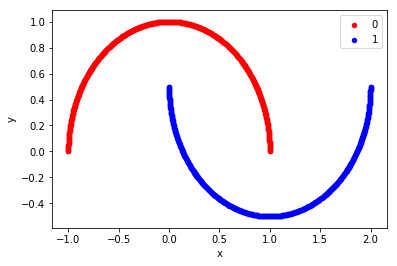

In [3]:
# From https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_regression,make_s_curve, make_friedman1
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X_1,y_1 = make_moons(n_samples=1000)
y_1 = np.array(y_1).reshape((len(y_1),1))
#X, y = make_blobs(n_samples=1000, centers=2, n_features=2)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X_1[:,0], y=X_1[:,1], label=y_1.squeeze()))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
print(X_1.shape, y_1.shape)
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [4]:
train_X, train_y, test_X, test_y = split_dataset(X_1,y_1)

train_y = train_y.reshape((1, len(train_y)))
test_y = test_y.reshape((1, len(test_y)))

# normalize_data
train_X, test_X, means, std_dev = normalize_data(train_X, test_X)

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((2, 800), (1, 800), (2, 200), (1, 200))

0
1
2
Cost after iteration 0: 0.746463
Cost after iteration 100: 0.163297
Cost after iteration 200: 0.079412
Cost after iteration 300: 0.041008
Cost after iteration 400: 0.024215
Cost after iteration 500: 0.015988
Cost after iteration 600: 0.011450
Cost after iteration 700: 0.008692
Cost after iteration 800: 0.006888
Cost after iteration 900: 0.005637
Cost after iteration 1000: 0.004730
Cost after iteration 1100: 0.004048
Cost after iteration 1200: 0.003521
Cost after iteration 1300: 0.003103
Cost after iteration 1400: 0.002765
Cost after iteration 1500: 0.002487
Cost after iteration 1600: 0.002254
Cost after iteration 1700: 0.002058
Cost after iteration 1800: 0.001890
Cost after iteration 1900: 0.001746
Cost after iteration 2000: 0.001619
Cost after iteration 2100: 0.001509
Cost after iteration 2200: 0.001411
Cost after iteration 2300: 0.001324
Cost after iteration 2400: 0.001246
Cost after iteration 2500: 0.001177
Cost after iteration 2600: 0.001113
Cost after iteration 2700: 0.00105

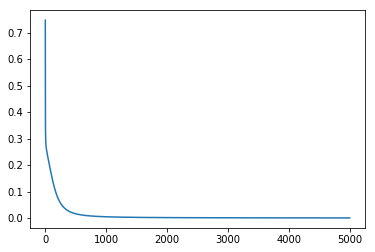

In [5]:
description = [{"layer_size" : 70, "activation" : "tanh"},
               {"layer_size" : 70, "activation" : "tanh"},
               {"layer_size" : 1, "activation" : "sigmoid"}]

model = NN(description,2,"cross_entropy_sigmoid", train_X, train_y, learning_rate=0.1)

history = model.train(5000)

plt.plot(history)



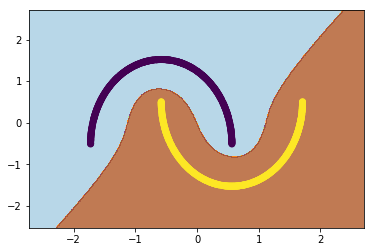

In [6]:
h = .01  # step size in the mesh
x_min, x_max = train_X[0, :].min() - 1, train_X[0,:].max() + 1
y_min, y_max = train_X[1,:].min() - 1, train_X.T[1:,].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

points = np.vstack((xx.ravel(), yy.ravel()))

model.data = points
model.forward_pass()
predictions  = np.where(model.layers[-1].A > 0.5, 1, 0).T

predictions = predictions.reshape(xx.shape)
predictions.shape

plt.contourf(xx, yy, predictions, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(train_X.T[:, 0], train_X.T[:, 1], c=np.squeeze(train_y))

#### 2) Load From Existing Datasets from sklearn

In [7]:
res = load_breast_cancer(return_X_y=True)

X_2,y_2 = res
y_2 = y_2.reshape((len(y_2), 1))

In [8]:
train_X, train_y, test_X, test_y = split_dataset(X_2,y_2)

train_y = train_y.reshape((1, len(train_y)))
test_y = test_y.reshape((1, len(test_y)))

# normalize_data
train_X, test_X, means, std_dev = normalize_data(train_X, test_X)

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((30, 455), (1, 455), (30, 114), (1, 114))

0
1
2
3
Cost after iteration 0: 0.740955
Cost after iteration 100: 0.628203
Cost after iteration 200: 0.456912
Cost after iteration 300: 0.285562
Cost after iteration 400: 0.198122
Cost after iteration 500: 0.153824
Cost after iteration 600: 0.126617
Cost after iteration 700: 0.108545
Cost after iteration 800: 0.096024
Cost after iteration 900: 0.087029
Cost after iteration 1000: 0.080371
Cost after iteration 1100: 0.075228
Cost after iteration 1200: 0.071104
Cost after iteration 1300: 0.067722
Cost after iteration 1400: 0.064847
Cost after iteration 1500: 0.062305
Cost after iteration 1600: 0.060050
Cost after iteration 1700: 0.058058
Cost after iteration 1800: 0.056242
Cost after iteration 1900: 0.054576
Cost after iteration 2000: 0.053018
Cost after iteration 2100: 0.051558
Cost after iteration 2200: 0.050191
Cost after iteration 2300: 0.048904
Cost after iteration 2400: 0.047670
Cost after iteration 2500: 0.046480
Cost after iteration 2600: 0.045329
Cost after iteration 2700: 0.044

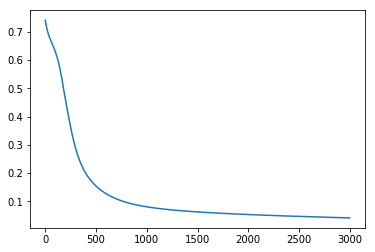

In [9]:
description = [{"layer_size" : 100, "activation" : "relu"},
               {"layer_size" : 50, "activation" : "relu"},
               {"layer_size" : 10, "activation" : "relu"},
               {"layer_size" : 1, "activation" : "sigmoid"}]

model = NN(description,30,"cross_entropy_sigmoid", train_X, train_y, learning_rate=0.0075)

history = model.train(3000)

plt.plot(history)

In [10]:
acc = model.calculate_accuracy(train_X, train_y)
print("Accuracy of the model on the training set is = {}".format(acc))

acc = model.calculate_accuracy(test_X, test_y)
print("Accuracy of the model on the test set is = {}".format(acc))

Accuracy of the model on the training set is = 0.9912087912087912
Accuracy of the model on the test set is = 0.9912280701754386


#### 3) Create Regression Data

In [11]:
def create_data(x):
    eps = np.random.normal(0,0.02)
    return x + 0.3*np.sin(2*np.pi*(x + eps)) + 0.3*np.sin(4*np.pi*(x + eps)) + eps

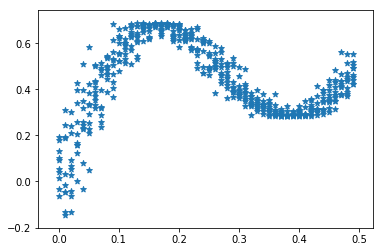

In [12]:
X_3 = []
y_3 = []
xs = np.arange(0,0.5,0.01)

for i in range(10):
    for x in xs:
        X_3.append(x)
        y_3.append(create_data(x))
plt.scatter(X_3,y_3,marker="*");

X_3 = np.array(X_3).reshape((len(X_3),1))
y_3 = np.array(y_3).reshape((len(y_3),1))

In [13]:
train_X, train_y, test_X, test_y = split_dataset(X_3,y_3)

train_y = train_y.reshape((1, len(train_y)))
test_y = test_y.reshape((1, len(test_y)))

# normalize_data
#train_X, test_X, means, std_dev = normalize_data(train_X, test_X)

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((1, 400), (1, 400), (1, 100), (1, 100))

0
1
2
3
4
Cost after iteration 0: 0.085222
Cost after iteration 100: 0.012847
Cost after iteration 200: 0.014052
Cost after iteration 300: 0.005300
Cost after iteration 400: 0.004423
Cost after iteration 500: 0.003611
Cost after iteration 600: 0.003328
Cost after iteration 700: 0.003011
Cost after iteration 800: 0.002845
Cost after iteration 900: 0.002941
Cost after iteration 1000: 0.002849
Cost after iteration 1100: 0.002618
Cost after iteration 1200: 0.003195
Cost after iteration 1300: 0.003114
Cost after iteration 1400: 0.002933
Cost after iteration 1500: 0.002668
Cost after iteration 1600: 0.002596
Cost after iteration 1700: 0.002578
Cost after iteration 1800: 0.002559
Cost after iteration 1900: 0.002717
Cost after iteration 2000: 0.002678
Cost after iteration 2100: 0.002366
Cost after iteration 2200: 0.002320
Cost after iteration 2300: 0.002694
Cost after iteration 2400: 0.002323
Cost after iteration 2500: 0.002273
Cost after iteration 2600: 0.002456
Cost after iteration 2700: 0.0

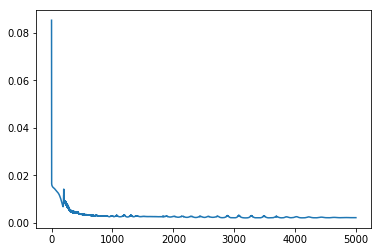

In [14]:
description = [{"layer_size" : 32, "activation" : "relu"},
               {"layer_size" : 16, "activation" : "relu"},
               {"layer_size" : 8, "activation" : "relu"},
               {"layer_size" : 4, "activation" : "relu"},
               {"layer_size" : 1, "activation" : "linear"}]

model = NN(description,1,"mean_squared", train_X, train_y, learning_rate=0.75)

history = model.train(5000)

plt.plot(history)

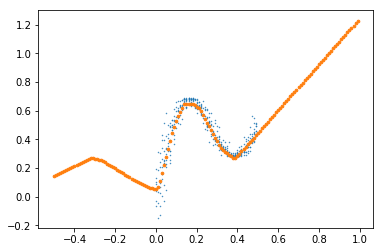

In [15]:
t = np.arange(-0.5,1,0.01)
t = t.reshape((1,len(t)))
model.data = t
model.forward_pass()
output = model.layers[-1].A
plt.scatter(train_X, train_y, marker='o', s=0.2)  # plot x vs y
plt.scatter(t, output, marker='o', s=7)  # plot x vs y